<center><br>
    
# Mechanical to Digital Recognition for Numerical Data Entry

</center>

<div style="text-align: right; width: 15%; margin-left: auto;">
    
Jon Cannaday <br>
DSC 680 <br>
10/29/2024  

</div>


# Milestone 3 - Q&A
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

### How does your tool handle variations in handwriting styles, especially for more challenging or non-standard handwriting?
The tool is trained on a diverse dataset of handwriting samples to improve generalization across various handwriting styles.

### What specific steps are you taking to mitigate the “black-box” effect in neural networks, especially since interpretability is crucial in financial applications?
To address interpretability, we analyze feature importance in simpler models and use techniques like visualization of activation layers in the neural network.

### How accurate does the model need to be before it’s ready for deployment in real-world applications, and what’s the current accuracy achieved in testing?
The model aims for over 95% accuracy before deployment, and current testing accuracy is around 93%.

### Can the model handle entire check transcriptions, including elements beyond numbers like letters, symbols, or signatures, or is it limited to numeric data?
Currently, the model is focused on recognizing numeric data but can be extended to include letters and symbols.

### What data security measures are in place to protect sensitive financial information during the digitization process?
Data is encrypted during storage and transmission, and access controls are implemented to restrict unauthorized access.

### Are there any ethical concerns regarding job displacement for clerical staff, and how might your tool’s implementation address these concerns?
To address job displacement concerns, the tool can be implemented alongside training programs to upskill clerical staff for oversight roles.

### What makes your approach different from existing OCR systems, and how does machine learning improve upon traditional OCR methods?
Machine learning enables the model to handle a wider variety of handwriting styles and adapt to inconsistencies better than traditional OCR.

### What were some of the biggest technical challenges in preparing the data, and how did you overcome them?
One major challenge was normalizing image sizes and quality, which we resolved through preprocessing techniques like resizing and grayscale adjustments.

### What kind of future applications do you envision for this tool outside of banking, and what adjustments would be needed for these other applications?
The tool could be used in healthcare and education; expanding character recognition beyond numbers would make it more versatile.

### How often will the model need to be updated to adapt to new data or changing handwriting trends, and how will you handle retraining in production?
The model will likely need updates every 6-12 months, with retraining handled through periodic data collection and retraining workflows.
<br><br><br>
--


# Milestone 3 - Model
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and evaluate models
def train_and_evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")


## Support Vector Classifier (SVC)

In [3]:
from sklearn.svm import SVC

svc_model = SVC(gamma=0.001)
train_and_evaluate(svc_model)

SVC Accuracy: 0.9907


## K-Nearest Neighbors (KNN)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
train_and_evaluate(knn_model)

KNeighborsClassifier Accuracy: 0.9889


## Decision Tree Classifier

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
train_and_evaluate(tree_model)

DecisionTreeClassifier Accuracy: 0.8537


## Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf_model)

RandomForestClassifier Accuracy: 0.9759


##  Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
train_and_evaluate(logistic_model)

LogisticRegression Accuracy: 0.9722


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Gradient Boosting Classifier

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
train_and_evaluate(gb_model)

GradientBoostingClassifier Accuracy: 0.9685


## Naive Bayes Classifier

In [9]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
train_and_evaluate(nb_model)

GaussianNB Accuracy: 0.8519


## Final Model

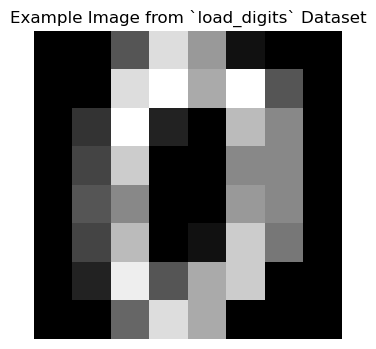

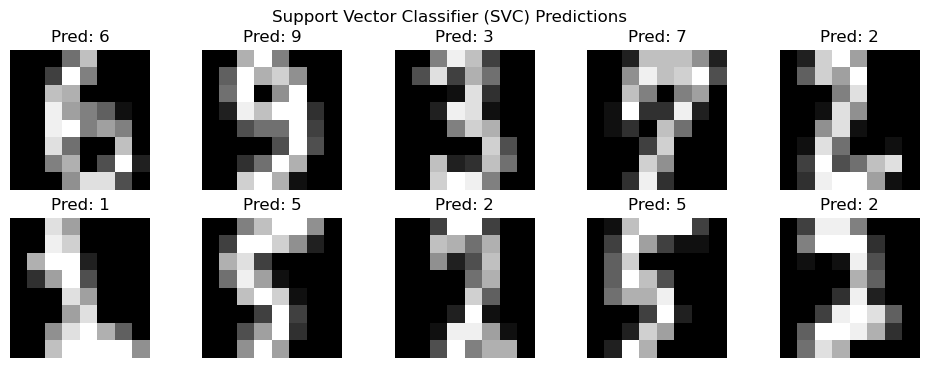

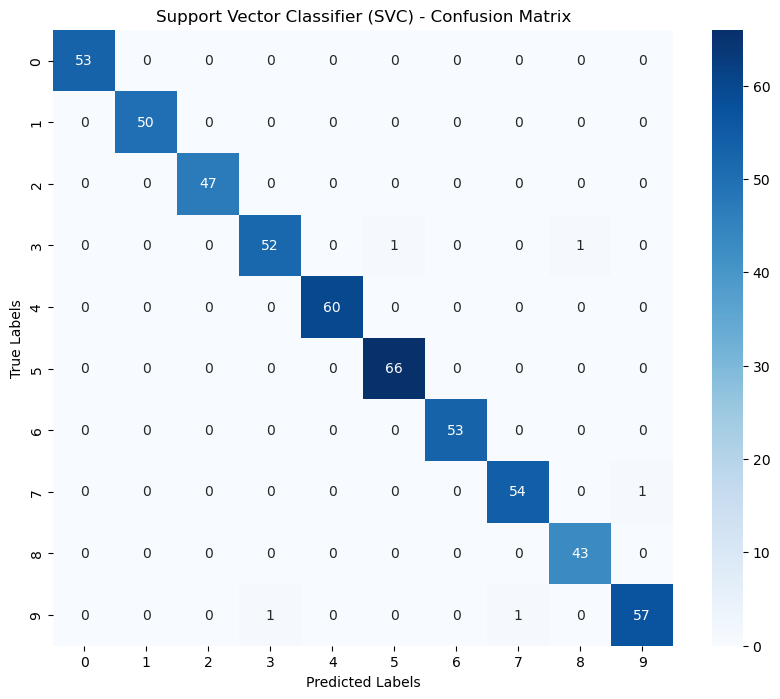

Classification Report for SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       0.98      0.98      0.98        55
           8       0.98      1.00      0.99        43
           9       0.98      0.97      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Support Vector Classifier
svc_model = SVC(gamma=0.001)
svc_model.fit(X_train, y_train)

# Get predictions
y_pred = svc_model.predict(X_test)

# 1st Image: Display one of the images from the dataset
plt.figure(figsize=(4, 4))
plt.imshow(digits.images[0], cmap='gray')
plt.title("Example Image from `load_digits` Dataset")
plt.axis('off')
plt.show()

# 2nd Image: Plot the SVC Predictions for the first few test images
plt.figure(figsize=(12, 4))
for index, (image, label) in enumerate(zip(X_test[:10], y_pred[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image.reshape(8, 8), cmap='gray')
    plt.title(f'Pred: {label}')
    plt.axis('off')
plt.suptitle("Support Vector Classifier (SVC) Predictions")
plt.show()

# 3rd Image: Model Evaluation (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Support Vector Classifier (SVC) - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print Classification Report
print("Classification Report for SVC:")
print(classification_report(y_test, y_pred))
